In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch 
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from scipy import stats
import os
import glob
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
# Define the directory containing the CSV files
data_dir = 'Data/'

# Use glob to find all CSV files in the directory
csv_files = glob.glob(f'{data_dir}/*.csv')

# Create an empty list to store DataFrames
dataframes = []

# Read CSV files using a loop
for filename in csv_files:
    df = pd.read_csv(filename)
    dataframes.append(df)

# Concatenate all DataFrames (ignoring index and without sorting)
combined_df = pd.concat(dataframes, ignore_index=True)

In [3]:
combined_df.head()

,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label,index,Unnamed: 0
0,2019-01-12 00:00:00.000,-0.760242,0.299570,0.468570,-5.092732,-0.298644,0.709439,6,NaN,NaN
1,2019-01-12 00:00:00.010,-0.530138,0.281880,0.319987,0.900547,0.286944,0.340309,6,NaN,NaN
2,2019-01-12 00:00:00.020,-1.170922,0.186353,-0.167010,-0.035442,-0.078423,-0.515212,6,NaN,NaN
3,2019-01-12 00:00:00.030,-0.648772,0.016579,-0.054284,-1.554248,-0.950978,-0.221140,6,NaN,NaN
4,2019-01-12 00:00:00.040,-0.355071,-0.051831,-0.113419,-0.547471,0.140903,-0.653782,6,NaN,NaN


In [4]:
pd.set_option("display.max_columns", None)

In [5]:
combined_df.describe()

,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label,index,Unnamed: 0
count,6.461328e+06,6.461328e+06,6.461328e+06,6.461328e+06,6.461328e+06,6.461328e+06,6.461328e+06,720639.000000,137646.000000
mean,-8.849574e-01,-1.326128e-02,-1.693779e-01,-5.948883e-01,2.087665e-02,3.749160e-01,6.783833e+00,195407.155799,68822.500000
std,3.775916e-01,2.311709e-01,3.647385e-01,6.263466e-01,3.884511e-01,7.360983e-01,1.143238e+01,111591.198157,39735.121914
min,-8.000000e+00,-4.307617e+00,-6.574463e+00,-8.000000e+00,-7.997314e+00,-8.000000e+00,1.000000e+00,0.000000,0.000000
25%,-1.002393e+00,-8.312914e-02,-3.720700e-01,-9.742110e-01,-1.000873e-01,-1.557138e-01,3.000000e+00,100151.000000,34411.250000
50%,-9.748998e-01,2.593677e-03,-1.374510e-01,-4.217309e-01,3.262909e-02,7.004390e-01,7.000000e+00,191640.000000,68822.500000
75%,-8.123032e-01,7.251000e-02,4.647321e-02,-1.678755e-01,1.549512e-01,9.486747e-01,7.000000e+00,285446.000000,103233.750000
max,2.291708e+00,6.491943e+00,4.909483e+00,7.999756e+00,7.999756e+00,8.406235e+00,1.400000e+02,424173.000000,137645.000000


In [6]:
print("Missing values per column:\n", combined_df.isnull().sum())

Missing values per column:
 timestamp           0
back_x              0
back_y              0
back_z              0
thigh_x             0
thigh_y             0
thigh_z             0
label               0
index         5740689
Unnamed: 0    6323682
dtype: int64


In [7]:
# Desired labels
desired_labels = [1, 2, 4, 5, 6, 7]

# Filter DataFrame based on desired labels
df_filtered = combined_df[combined_df['label'].isin(desired_labels)]

In [8]:
df_filtered['label'].unique()

array([6, 1, 7, 4, 5, 2])

In [9]:
df = df_filtered.drop(labels = ['index', 'Unnamed: 0', 'timestamp'], axis = 'columns')

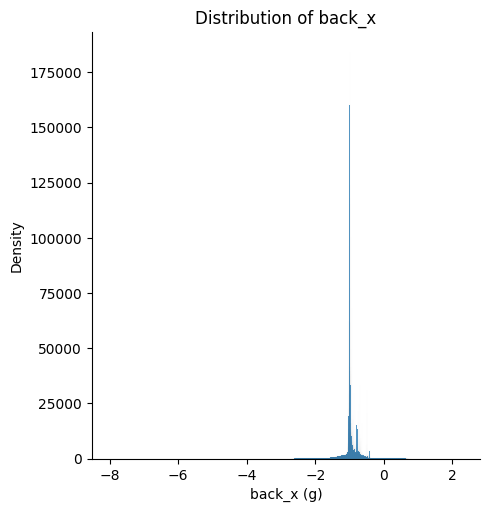

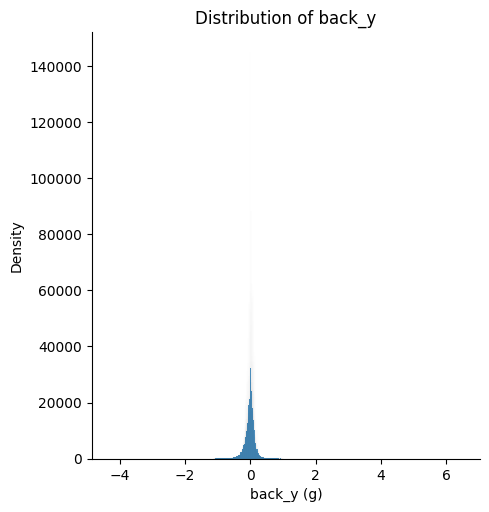

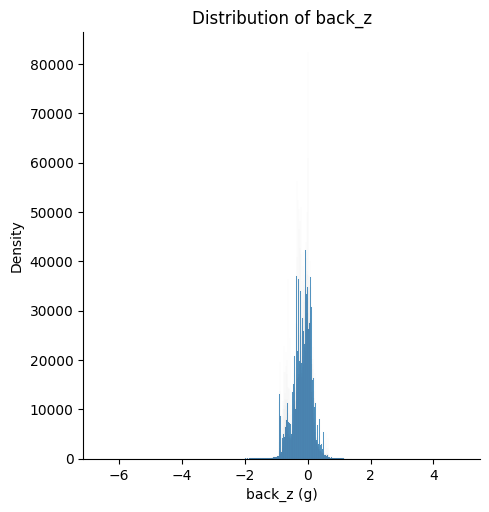

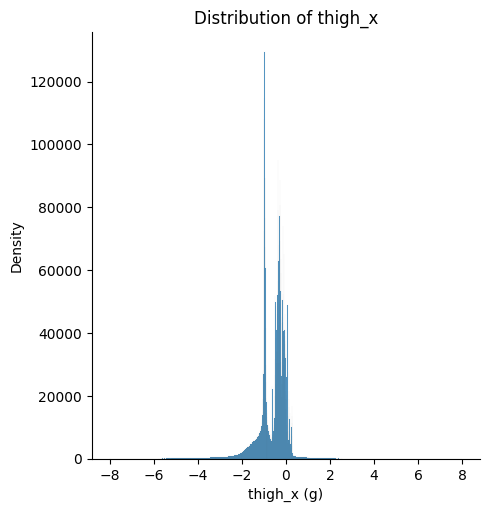

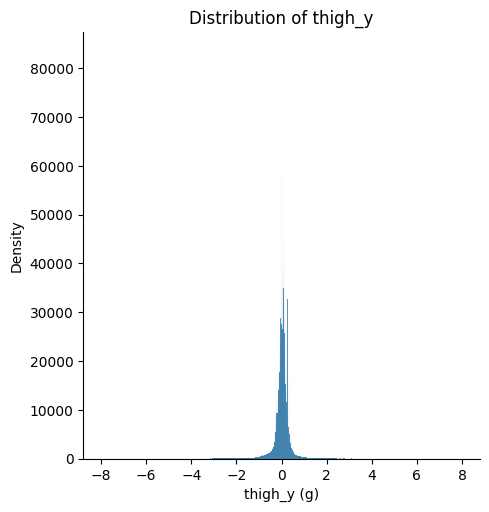

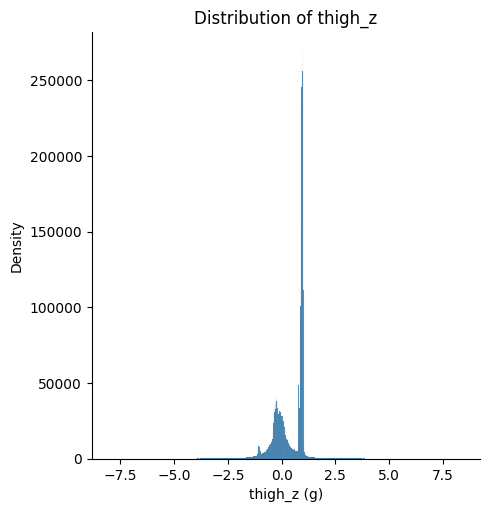

In [10]:
# Analyze distribution of sensor readings for each axis (x, y, z)
for sensor in ['back', 'thigh']:
    for axis in ['x', 'y', 'z']:
        col_name = f"{sensor}_{axis}"
        sns.displot(df[col_name])
        plt.title(f"Distribution of {col_name}")
        plt.xlabel(f"{col_name} (g)")
        plt.ylabel("Density")
        plt.show()

In [11]:
# Calculate descriptive statistics for each sensor axis
for sensor in ['back', 'thigh']:
    for axis in ['x', 'y', 'z']:
        col_name = f"{sensor}_{axis}"
        descriptive_stats = df[col_name].describe()
        print(f"\nDescriptive statistics for {col_name}:\n", descriptive_stats)


Descriptive statistics for back_x:
 count    5.278164e+06
mean    -9.496204e-01
std      3.237051e-01
min     -8.000000e+00
25%     -1.005299e+00
50%     -9.843670e-01
75%     -8.873006e-01
max      2.291708e+00
Name: back_x, dtype: float64

Descriptive statistics for back_y:
 count    5.278164e+06
mean    -5.189564e-03
std      1.579034e-01
min     -4.307617e+00
25%     -6.978623e-02
50%      9.970028e-03
75%      7.397500e-02
max      6.491943e+00
Name: back_y, dtype: float64

Descriptive statistics for back_z:
 count    5.278164e+06
mean    -1.832276e-01
std      3.116941e-01
min     -6.574463e+00
25%     -3.439940e-01
50%     -1.403810e-01
75%      2.305463e-02
max      4.909483e+00
Name: back_z, dtype: float64

Descriptive statistics for thigh_x:
 count    5.278164e+06
mean    -5.934708e-01
std      6.407180e-01
min     -8.000000e+00
25%     -9.687500e-01
50%     -4.019756e-01
75%     -1.850275e-01
max      7.999756e+00
Name: thigh_x, dtype: float64

Descriptive statistics for th

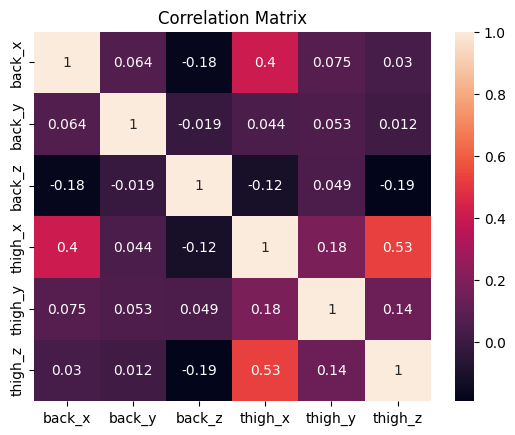

In [12]:
# Correlation analysis between sensor readings
correlation_matrix = df[['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()


In [13]:
df['back_mag'] = np.sqrt(df['back_x']**2 + df['back_y']**2 + df['back_z']**2)
df['thigh_mag'] = np.sqrt(df['thigh_x']**2 + df['thigh_y']**2 + df['thigh_z']**2)

In [14]:
df.isnull().sum()

back_x       0
back_y       0
back_z       0
thigh_x      0
thigh_y      0
thigh_z      0
label        0
back_mag     0
thigh_mag    0
dtype: int64

In [15]:
df.isna().sum()

back_x       0
back_y       0
back_z       0
thigh_x      0
thigh_y      0
thigh_z      0
label        0
back_mag     0
thigh_mag    0
dtype: int64

In [16]:
df.shape

(5278164, 9)

In [17]:
df['label'].nunique()

6

In [18]:
df['label'].unique()

array([6, 1, 7, 4, 5, 2])

In [19]:
df.head()

,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label,back_mag,thigh_mag
0,-0.760242,0.299570,0.468570,-5.092732,-0.298644,0.709439,6,0.941949,5.150574
1,-0.530138,0.281880,0.319987,0.900547,0.286944,0.340309,6,0.680364,1.004556
2,-1.170922,0.186353,-0.167010,-0.035442,-0.078423,-0.515212,6,1.197363,0.522350
3,-0.648772,0.016579,-0.054284,-1.554248,-0.950978,-0.221140,6,0.651250,1.835470
4,-0.355071,-0.051831,-0.113419,-0.547471,0.140903,-0.653782,6,0.376332,0.864297


In [20]:
# Map labels to the range [0, num_classes - 1]
label_map = {label: i for i, label in enumerate(np.unique(df['label']))}
df['label'] = df['label'].map(label_map)

In [21]:

from sklearn.model_selection import train_test_split

X = df.drop(['label'], axis=1).astype(np.float32).values
y = df['label'].values.astype(np.int64)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Define hyperparameters (adjust as needed)
input_size = X.shape[1]  # Number of features
num_classes = len(np.unique(y))  # Number of unique labels
hidden_size = 64  # Size of the hidden layer
sequence_length = X.shape[0]  # Each row is a sequence

# Create PyTorch tensors
X_train_tensor = torch.from_numpy(X_train)
X_test_tensor = torch.from_numpy(X_test)
y_train_tensor = torch.from_numpy(y_train)
y_test_tensor = torch.from_numpy(y_test)

In [23]:
num_classes

6

In [24]:
import torch
import torch.nn as nn
from torch.nn.functional import relu  # ReLU activation function (optional)
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
from tqdm import tqdm

class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, weight_decay=0.001):
        super(LSTMClassifier, self).__init__()
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
        self.weight_decay = weight_decay

    def forward(self, x):
        x, _ = self.lstm(x)  # Extract hidden state from LSTM
        x = x[:, -1, :]  # Get the last hidden state for classification
        x = self.fc(x)
        return x

    def get_regularization_loss(self):  # Define function to calculate L2 regularization loss
        l2_reg = 0
        for param in self.parameters():
            if param.requires_grad:  # Only consider trainable parameters
                l2_reg += torch.norm(param) ** 2
        return self.weight_decay * l2_reg  # Apply weight_decay factor

In [33]:
weight_decay = 0.0075  # Adjust this value based on experimentation
model = LSTMClassifier(input_size=input_size, hidden_size=hidden_size, num_classes=num_classes, weight_decay=weight_decay)

In [36]:
# Define optimizer and loss function (adjust learning rate and weight_decay as needed)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.0035, weight_decay=weight_decay)  # Adjust learning rate and weight decay as needed


In [37]:
# Reset the accuracy variable to None
test_accuracy = None

# Function to calculate accuracy
def calculate_accuracy(outputs, targets):
    _, predictions = torch.max(outputs.data, 1)
    return (predictions == targets).sum().item() / len(targets)

# Train the model
num_epochs = 10  # Adjust number of epochs for training
for epoch in range(num_epochs):
    # Train loop
    model.train()
    train_losses, train_accs = [], []
    train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=32)

    # Use tqdm to visualize training progress
    with tqdm(train_loader, unit="batch") as train_bar:
        for i, (data, target) in enumerate(train_bar):
            # Clear gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(data.unsqueeze(1))  # Add a dimension for batch size

            # Calculate loss
            loss = criterion(outputs, target)

            # Get L2 regularization loss
            regularization_loss = model.get_regularization_loss()

            # Combine losses
            total_loss = loss + regularization_loss

            # Backward pass and optimize
            total_loss.backward()
            optimizer.step()

            train_losses.append(loss.item())
            train_accs.append(calculate_accuracy(outputs, target))

            # Update progress bar with loss
            train_bar.set_postfix({"Train Loss": f"{loss.item():.4f}"})

    # Calculate training loss and accuracy
    train_loss = np.mean(train_losses)
    train_acc = np.mean(train_accs)

    print(f"Epoch: {epoch+1}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")

    # Evaluate on test set after each epoch (optional)
    model.eval()
    with torch.no_grad():
        test_loss, test_accuracy = 0, 0
        test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=32)

        # Use tqdm to visualize test progress
        with tqdm(test_loader, unit="batch") as test_bar:
            for i, (data, target) in enumerate(test_bar):
                outputs = model(data.unsqueeze(1))  # Add a dimension for batch size
                test_loss += criterion(outputs, target).item()
                _, predicted = torch.max(outputs.data, 1)
                test_accuracy += (predicted == target).sum().item()

                test_bar.set_postfix({"Test Loss": f"{test_loss/(i+1):.4f}"})  # Update progress bar with loss

        test_loss /= len(y_test)
        test_accuracy /= len(y_test)

        print(f"Epoch: {epoch+1}, Test Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.4f}")

100%|██████████| 131955/131955 [12:51<00:00, 171.06batch/s, Train Loss=0.7691]


Epoch: 1, Train Loss: 0.6509, Train Acc: 0.7394


100%|██████████| 32989/32989 [01:42<00:00, 320.34batch/s, Test Loss=0.6525]


Epoch: 1, Test Loss: 0.0204, Accuracy: 0.7391


 13%|█▎        | 17404/131955 [02:32<23:04, 82.74batch/s, Train Loss=0.4406] 

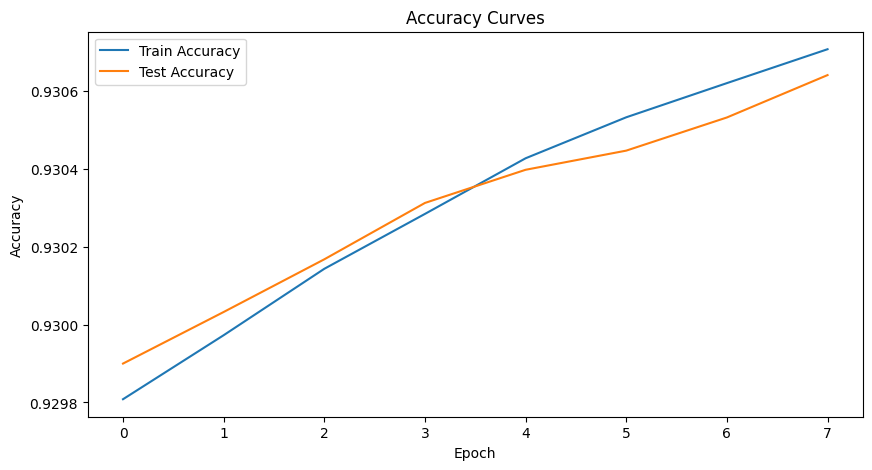

In [ ]:
# Plot training and test accuracies
plt.figure(figsize=(10, 5))
plt.plot(train_accs, label='Train Accuracy')
plt.plot(test_accs, label='Test Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()